<a href="https://colab.research.google.com/github/gmazzitelli/studenti/blob/master/ransac_pipline_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

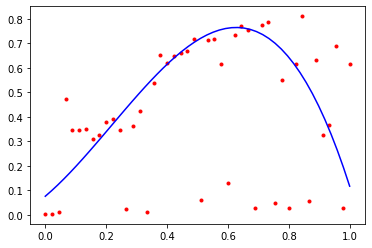

In [11]:
#
# esempio con l'uso della PIPLINE
#
import numpy as np
import matplotlib.pyplot as plt
y_values = np.array([0.00441025, 0.0049001 , 0.01041189, 0.47368389, 0.34841961,
       0.3487533 , 0.35067096, 0.31142986, 0.3268407 , 0.38099566,
       0.3933048 , 0.3479948 , 0.02359819, 0.36329588, 0.42535543,
       0.01308297, 0.53873956, 0.6511364 , 0.61865282, 0.64750302,
       0.6630047 , 0.66744816, 0.71759617, 0.05965622, 0.71335208,
       0.71992683, 0.61635697, 0.12985441, 0.73410642, 0.77318621,
       0.75675988, 0.03003641, 0.77527201, 0.78673995, 0.05049178,
       0.55139476, 0.02665514, 0.61664748, 0.81121749, 0.05521697,
       0.63404375, 0.32649395, 0.36828268, 0.68981099, 0.02874863,
       0.61574739])
x_values = np.linspace(0, 1, len(y_values))
poly_degree = 3

from sklearn.linear_model import (
    LinearRegression, TheilSenRegressor, RANSACRegressor, HuberRegressor)
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
plt.plot(x_values, y_values, 'r.')
x_plot = np.linspace(x_values.min(), x_values.max())
X = x_values[:, np.newaxis]

model = make_pipeline(PolynomialFeatures(poly_degree), RANSACRegressor())
model.fit(X, y_values)
mse = mean_squared_error(model.predict(X), y_values)

y_plot = model.predict(x_plot[:, np.newaxis])
plt.plot(x_plot, y_plot, 'b-', label='error = %.3f' % (mse))
plt.show()

[-1.5869385   2.11680255  0.01613176]


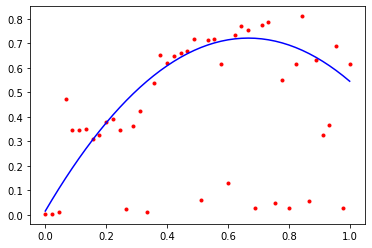

In [10]:
#
# esempio dello stesso fit SENZA PIPLINE
#
poly_degree = 2

plt.plot(x_values, y_values, 'r.')
x_plot = np.linspace(x_values.min(), x_values.max())
X = x_values[:, np.newaxis]

function_feature = PolynomialFeatures(poly_degree)
X = function_feature.fit_transform(X, y_values)
ransac = RANSACRegressor()
rfit = ransac.fit(X, y_values)
y_plot = rfit.predict(X)

coeffs = np.polyfit(x_values, y_plot, poly_degree)
print (coeffs)
plt.plot(x_values, y_plot, 'b-')
plt.show()